In [1]:
# Install the required libraries
#SAM
!pip3 install git+https://github.com/facebookresearch/segment-anything.git
#Transformers
!pip3 install -q git+https://github.com/huggingface/transformers.git
#Datasets to prepare data and monai if you want to use special loss functions
!pip3 install datasets
!pip3 install -q monai
#Patchify to divide large images into smaller patches for training. (Not necessary for smaller images)
!pip3 install patchify

  Cloning https://github.com/facebookresearch/segment-anything.git to c:\users\administrator\appdata\local\temp\pip-req-build-vyaqh1w5
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36832 sha256=fcb16df84a95ef564b491513ac7539b69b6bb44ef854083b24ef3c7856d72548
  Stored in directory: C:\Users\Administrator\AppData\Local\Temp\pip-ephem-wheel-cache-tnas_8dk\wheels\29\82\ff\04e2be9805a1cb48bec0b85b5a6da6b63f647645750a0e42d4
Successfully built segment_anything


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git 'C:\Users\Administrator\AppData\Local\Temp\pip-req-build-vyaqh1w5'

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   --------------------------------------  542.7/547.8 kB 16.6 MB/s eta 0:00:01
   --------------------------------------- 547.8/547.8 kB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
   ---------------------------------------- 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/316.1 kB ? eta -:--:--
   --------------------------------------- 316.1/316.1 kB 19.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/369.0 kB ? eta -:--:--
   ---------------------------------------- 369.0/369.0 kB 7.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.8 MB 17.6 MB/s eta 0:00:02
   -- ------------------------------------- 1.7/25.8 MB 18.3 MB/s eta 0:00:02
   --- ------------------------------------ 2.5/25.8 MB 17.9 MB/s eta 0:00:02
   ----- ---


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# imports

import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import patchify as patchify


# this function will be used to get an array of images from a folder

def read_images_to_array(folder_path):

  image_array = []
  # Get a sorted list of filenames
  filenames = sorted(os.listdir(folder_path))
  for filename in filenames:
    if filename.endswith(".jpg") or filename.endswith(".png"):
      img_path = os.path.join(folder_path, filename)
      img = cv2.imread(img_path)

      if img is not None:
        image_array.append(img)

  return image_array


In [5]:
folder_path_images = './data/images (raw)'
image_array = read_images_to_array(folder_path_images)

# this is based on if the image has a white pixel at 25, 100
# ussually this seperates the two image types

red_region_data = []
raw_data = []

for image in image_array:
  if image[25, 100].sum() == 255 * 3:
    red_region_data.append(image)
  else:
    raw_data.append(image)

To test out if the function above works:

Text(0.5, 1.0, 'Raw Image')

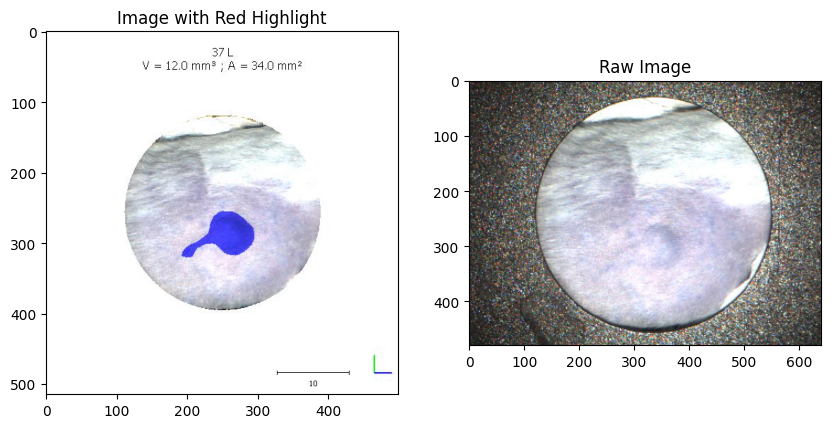

In [6]:
# picks a random image and displays it

rand = random.randint(0, len(red_region_data) - 1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(red_region_data[rand])
ax[0].set_title('Image with Red Highlight')

ax[1].imshow(raw_data[rand])
ax[1].set_title('Raw Image')

In [7]:
# this crops out the noise from the raw images

raw_images_masked = []

# for loop

for i in range(len(raw_data) - 1):

  img = raw_data[i]

  mask = np.zeros(img.shape, dtype=np.uint8)
  mask = cv2.circle(mask, (320, 240), 200, (255,255,255), -1)

  res = cv2.bitwise_and(img, mask)
  res[mask==0] = 255

  raw_images_masked.append(res)

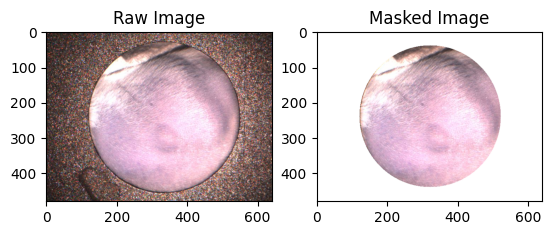

In [8]:
# picks a random number and displays it 

rand = random.randint(0, len(raw_images_masked) - 1)

fig, ax = plt.subplots(1,2)
ax[0].imshow(raw_data[rand])
ax[0].set_title("Raw Image")
ax[1].imshow(raw_images_masked[rand])
ax[1].set_title('Masked Image')

plt.show()

In [9]:
# this masks out the pictures that have the red region as well

red_region_circle_masks = []

# for loop

for i in range(len(red_region_data) - 1):

  img = red_region_data[i]

  mask = np.zeros(img.shape, dtype=np.uint8)
  mask = cv2.circle(mask, (250, 257), 135, (255,255,255), -1)

  res = cv2.bitwise_and(img, mask)
  res[mask==0] = 255

  red_region_circle_masks.append(res)

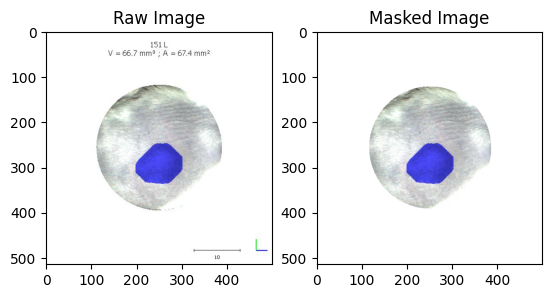

In [10]:
# picks a random image and displays it 

rand = random.randint(0, len(red_region_data) - 1)

fig, ax = plt.subplots(1,2)
ax[0].imshow(red_region_data[rand])
ax[0].set_title("Raw Image")
ax[1].imshow(red_region_circle_masks[rand])
ax[1].set_title('Masked Image')

plt.show()


In [11]:
# for loop to binary masks based off of the images with the red highlight

binary_masks = []

for image in red_region_circle_masks:

  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  lower_red = np.array([0,150,115])
  upper_red = np.array([255,255,255])


  mask = cv2.inRange(hsv, lower_red, upper_red)
  res = cv2.bitwise_and(image,image, mask= mask)


  binary_masks.append(mask)

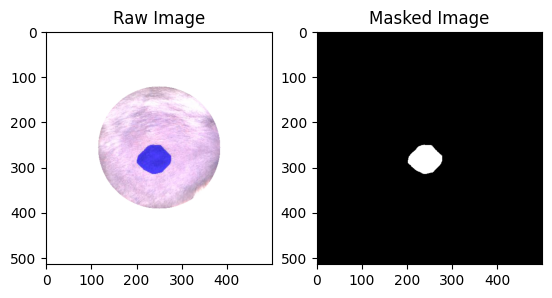

In [12]:
# picks a random image and displays it 

rand = random.randint(0, len(binary_masks) - 1)

fig, ax = plt.subplots(1,2)
ax[0].imshow(red_region_circle_masks[rand])
ax[0].set_title("Raw Image")
ax[1].imshow(binary_masks[rand], cmap = "gray")
ax[1].set_title('Masked Image')

plt.show()

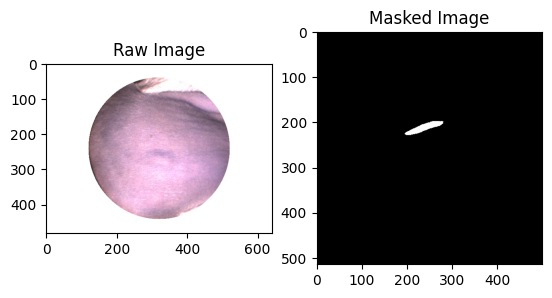

In [13]:
# displays the raw image and mask that we created side by side 
# they are not the same size so we have to fix that

rand = random.randint(0, len(binary_masks) - 1)

fig, ax = plt.subplots(1,2)
ax[0].imshow(raw_images_masked[rand])
ax[0].set_title("Raw Image")
ax[1].imshow(binary_masks[rand], cmap = "gray")
ax[1].set_title('Masked Image')

plt.show()

In [14]:
from PIL import Image
import numpy as np

resized_binary_masks = []
for mask in binary_masks:
  y=0
  x=0
  h=480
  w=640
  crop = mask[y:y+h, x:x+w]

  resized_binary_masks.append(crop)

# now that we have cropped the height, we have to add padding to the width

import cv2

padding = 70

padded_masks = []
for mask in resized_binary_masks:
  padded_img = cv2.copyMakeBorder(mask, 0, 0, padding, padding, cv2.BORDER_CONSTANT, value=[0, 0, 0])
  padded_masks.append(padded_img)


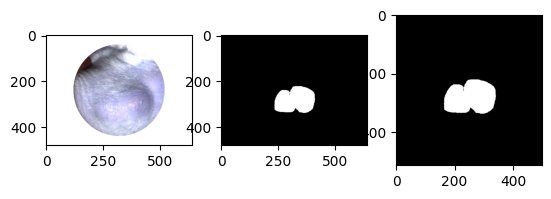

In [15]:
rand = random.randint(0, len(padded_masks) - 1)

fig, ax = plt.subplots(1,3)
ax[0].imshow(raw_images_masked[rand])
ax[1].imshow(padded_masks[rand], cmap = "gray")
ax[2].imshow(binary_masks[rand], cmap = "gray")

plt.show()

In [16]:
final_binary_masks = padded_masks

In [17]:
#Get bounding boxes from mask.
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox

Now we have to resize the images in order to use them for training effectivly:

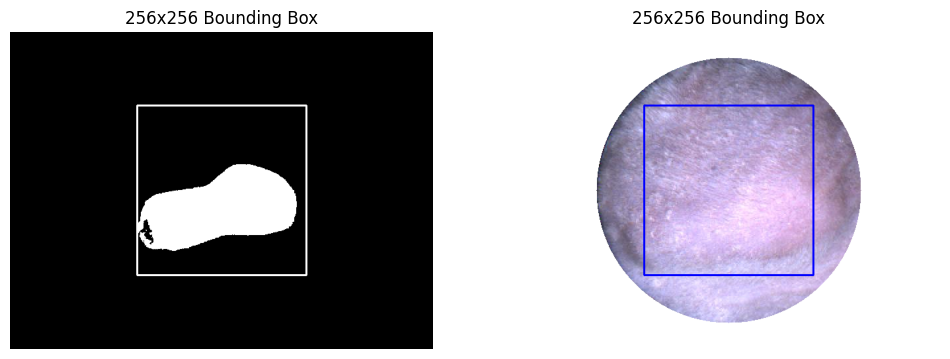

In [18]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

rand = random.randint(0, len(final_binary_masks) - 1)

# Get a random image
test_image_mask = final_binary_masks[rand]
test_image_raw = raw_images_masked[rand]

# Get the dimensions of the image
image_height, image_width = test_image_mask.shape[:2]

# Bounding box dimensions
box_width, box_height = 256, 256

# calculate the dimensions of the bounding box, based on the width and height of the orginal
x_top_left = (image_width - box_width) // 2
y_top_left = (image_height - box_height) // 2
x_bottom_right = x_top_left + box_width
y_bottom_right = y_top_left + box_height

# Draw the bounding box (blue color with thickness 2)
cv2.rectangle(test_image_mask, (x_top_left, y_top_left), (x_bottom_right, y_bottom_right), (255, 0, 0), 2)
cv2.rectangle(test_image_raw, (x_top_left, y_top_left), (x_bottom_right, y_bottom_right), (255, 0, 0), 2)

# Display the images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(test_image_mask, cv2.COLOR_BGR2RGB))
ax[0].set_title('256x256 Bounding Box')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(test_image_raw, cv2.COLOR_BGR2RGB))
ax[1].set_title('256x256 Bounding Box')
ax[1].axis('off')

plt.show()


In [19]:
# now that we see that all the data can fit within 256x256
# we can write code that will crop out the images 

cropped_binary_arr = []
cropped_raw_arr = []

for i in range(len(final_binary_masks) - 1): 

    raw_image = raw_images_masked[i]
    binary_image = final_binary_masks[i]

    image_height, image_width = raw_image.shape[:2]

    # Bounding box dimensions
    box_width, box_height = 256, 256

    x_top_left = (image_width - box_width) // 2
    y_top_left = (image_height - box_height) // 2
    x_bottom_right = x_top_left + box_width
    y_bottom_right = y_top_left + box_height
    
    # Crop the images using array slicing
    cropped_binary = binary_image[y_top_left:y_bottom_right, x_top_left:x_bottom_right]
    cropped_raw = raw_image[y_top_left:y_bottom_right, x_top_left:x_bottom_right]

    cropped_binary_arr.append(cropped_binary)
    cropped_raw_arr.append(cropped_raw)

final_binary_masks = cropped_binary_arr
raw_images_masked = cropped_raw_arr


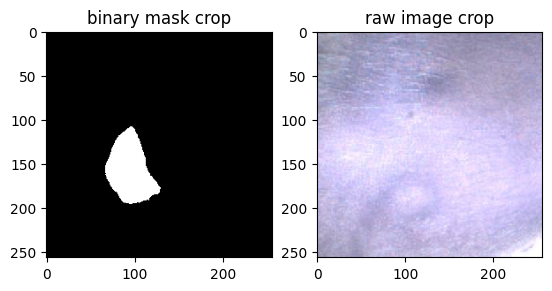

In [20]:
# test to see if the crop worked 

rand = random.randint(0, len(final_binary_masks) - 1) 

fig, ax = plt.subplots(1,2)

ax[0].imshow(final_binary_masks[rand], cmap = 'gray') 
ax[0].set_title('binary mask crop') 

ax[1].imshow(raw_images_masked[rand]) 
ax[1].set_title('raw image crop')

plt.show()


In [21]:
# now create a dataset with these images 

# convert lists to arrays
raw_images_masked = np.array(raw_images_masked)
final_binary_masks = np.array(final_binary_masks)

from datasets import Dataset
from PIL import Image

# Convert the NumPy arrays to Pillow images and store them in a dictionary
dataset_dict = {
    "image": [Image.fromarray(img) for img in raw_images_masked],
    "label": [Image.fromarray(mask) for mask in final_binary_masks],
}

# Create the dataset using the datasets.Dataset class
dataset = Dataset.from_dict(dataset_dict)

final_binary_masks.shape

(275, 256, 256)

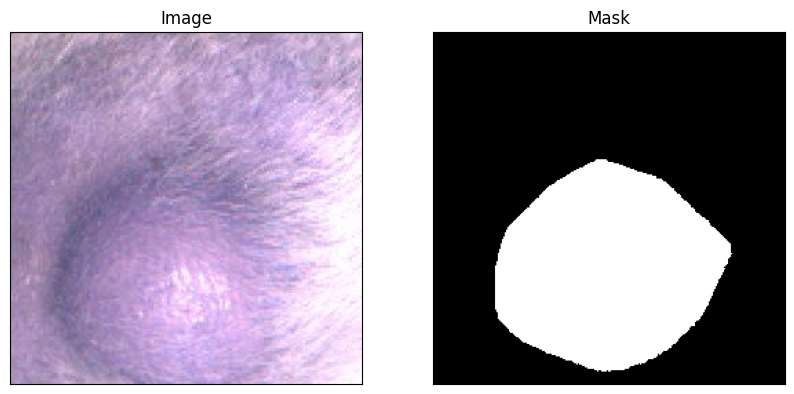

In [22]:
# now to check that everything is working 

img_num = random.randint(0, raw_images_masked.shape[0]-1)
example_image = dataset[img_num]["image"]
example_mask = dataset[img_num]["label"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(np.array(example_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

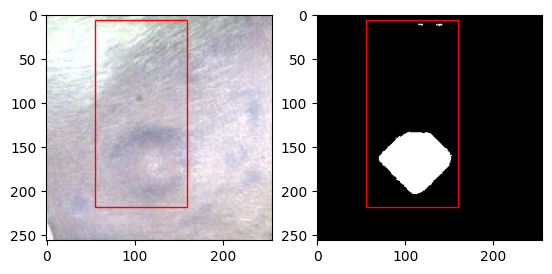

In [23]:
# test

import matplotlib.patches as patches # Import the patches module


rand = random.randint(0, len(final_binary_masks) - 1)

bbox1 = get_bounding_box(final_binary_masks[rand])

fig, ax = plt.subplots(1,2)
ax[0].imshow(raw_images_masked[rand])
ax[1].imshow(final_binary_masks[rand], cmap = "gray")

#
# Create a Rectangle patch
rect1 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2] - bbox1[0], bbox1[3] - bbox1[1], linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2] - bbox1[0], bbox1[3] - bbox1[1], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax[0].add_patch(rect1)
ax[1].add_patch(rect2)

plt.show()

In [24]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["label"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

In [25]:
from transformers import SamProcessor

processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Administrator\.cache\huggingface\hub\models--facebook--sam-vit-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [29]:
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [30]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)


In [2]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)

NameError: name 'train_dataset' is not defined

In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

In [33]:
batch["ground_truth_mask"].shape

torch.Size([2, 256, 256])

In [34]:
from transformers import SamModel

model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [36]:
from torch.optim import Adam
import monai

# Note: Hyperparameter tuning could improve performance here
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)

seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

In [ ]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

num_epochs = 10

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_dataloader):
      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

      # compute loss
      predicted_masks = outputs.pred_masks.squeeze(1)
      ground_truth_masks = batch["ground_truth_mask"].float().to(device)
        
      loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()
      epoch_losses.append(loss.item())

    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')

100%|███████████████████████████████████████████████████████████████| 138/138 [42:43<00:00, 18.58s/it]


EPOCH: 0
Mean loss: -26251.584953211357


100%|███████████████████████████████████████████████████████████████| 138/138 [42:14<00:00, 18.36s/it]


EPOCH: 1
Mean loss: -130794.66918591486


100%|███████████████████████████████████████████████████████████████| 138/138 [41:17<00:00, 17.95s/it]


EPOCH: 2
Mean loss: -238448.65347599637


100%|███████████████████████████████████████████████████████████████| 138/138 [41:04<00:00, 17.86s/it]


EPOCH: 3
Mean loss: -352388.930395154


100%|███████████████████████████████████████████████████████████████| 138/138 [41:13<00:00, 17.93s/it]


EPOCH: 4
Mean loss: -487564.5490262681


100%|███████████████████████████████████████████████████████████████| 138/138 [41:09<00:00, 17.90s/it]


EPOCH: 5
Mean loss: -646927.9552762681


 78%|████████████████████████████████████████████████▊              | 107/138 [32:06<09:18, 18.02s/it]

In [ ]:
import torch

# Save the model to a subdirectory within the current working directory
torch.save(model.state_dict(), "./models/model1")

In [ ]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)
    train_dataset = SAMDataset(dataset=train_data, processor=processor)
    val_dataset = SAMDataset(dataset=val_data, processor=processor)

In [ ]:
val_dataloader = DataLoader(val_dataset, batch_size=2, shuffle=False)

In [ ]:
def validate(model, val_dataloader, device):
    model.eval()
    val_losses = []
    with torch.no_grad():
        for batch in val_dataloader:
            outputs = model(pixel_values=batch["pixel_values"].to(device),
                            input_boxes=batch["input_boxes"].to(device),
                            multimask_output=False)

            predicted_masks = outputs.pred_masks.squeeze(1)
            ground_truth_masks = batch["ground_truth_mask"].float().to(device)

            ground_truth_masks = nn.functional.interpolate(ground_truth_masks.unsqueeze(1),
                                                          size=predicted_masks.shape[-2:],
                                                          mode='bilinear',
                                                          align_corners=False).squeeze(1)

            loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))
            val_losses.append(loss.item())
    return mean(val_losses)


In [ ]:
for epoch in range(num_epochs):
    model.train()
    epoch_losses = []
    for batch in tqdm(train_dataloader):
        # forward pass
        outputs = model(pixel_values=batch["pixel_values"].to(device),
                        input_boxes=batch["input_boxes"].to(device),
                        multimask_output=False)

        # compute loss
        predicted_masks = outputs.pred_masks.squeeze(1)
        ground_truth_masks = batch["ground_truth_mask"].float().to(device)

        ground_truth_masks = nn.functional.interpolate(ground_truth_masks.unsqueeze(1),
                                                      size=predicted_masks.shape[-2:],
                                                      mode='bilinear',
                                                      align_corners=False).squeeze(1)

        loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # optimize
        optimizer.step()
        epoch_losses.append(loss.item())

    mean_train_loss = mean(epoch_losses)
    mean_val_loss = validate(model, val_dataloader, device)

    print(f'EPOCH: {epoch}')
    print(f'Mean training loss: {mean_train_loss}')
    print(f'Mean validation loss: {mean_val_loss}')
